<a href="https://colab.research.google.com/github/avnish22/Bank_Database_Management/blob/main/House_Price_Advance_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#number of rows and columns
train.shape

(1460, 81)

# Data Cleaning
**1.Deal with null values**


In [ ]:
# 1.Deal with the null values
# check for null values in the dataset
train.isnull().sum().sum()

7829

### As you see there are too many null values in this datset, so lets deal with these null values.

In [ ]:
# Remove cat_over_columns. Categorical columns that have 1 type overwhelming than other (>= 90%)
cat_over_columns = ['Street', 'Alley', 'LandContour','Utilities','Condition2','RoofMatl','BsmtCond','Heating','Electrical','Functional','GarageQual','GarageCond','PavedDrive']
train.drop(columns=cat_over_columns, inplace=True)

In [ ]:
# Columns that have too many NA (No condition )
# Example NA is 'No Pool' for column PoolQC and most of data in this column is 'No Pool'.
too_much_na_columns = ['PoolQC', 'Fence', 'MiscFeature']

# Drop too_much_na_columns columns too
train.drop(columns=too_much_na_columns, inplace=True)

# Drop ID column too
train.drop(columns=["Id"], inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
# As you see there are too many null values in the dataset
# So let fill the missing value first (mean imputation for numeric columns)
num_cols = train.select_dtypes(include=['number']).columns


# Mean Imputation for Numerical Columns
mean_imputer = SimpleImputer(strategy='mean')
train[num_cols] = mean_imputer.fit_transform(train[num_cols])

In [ ]:
# there are also some null values in categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Mode Imputation for Categorical Columns
mode_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = mode_imputer.fit_transform(train[categorical_cols])

In [ ]:
# now lets see for the null values again
train.isnull().sum().sum()

0

# Feature selection


In [ ]:
# List of relevant columns based on the analysis
relevant_columns = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood',
    'Condition1', 'LotArea', 'ExterQual', 'BsmtQual', 'KitchenQual',
    'HeatingQC', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'SaleType', 'SaleCondition', 'LotFrontage',
    'MasVnrArea', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MoSold', 'YrSold','SalePrice'
]
# Drop all other columns that are not in the relevant_columns list
train = train[relevant_columns]

In [ ]:
# there is no null value in this
train.isnull().sum().sum()

0

In [ ]:
# Verify the columns have been dropped
print("Remaining columns after dropping irrelevant ones:")
print(train.columns)

Remaining columns after dropping irrelevant ones:
Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood',
       'Condition1', 'LotArea', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'HeatingQC', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'SaleType', 'SaleCondition', 'LotFrontage',
       'MasVnrArea', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')


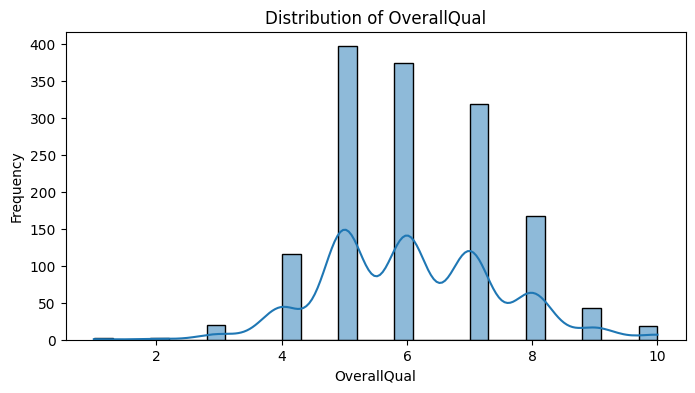

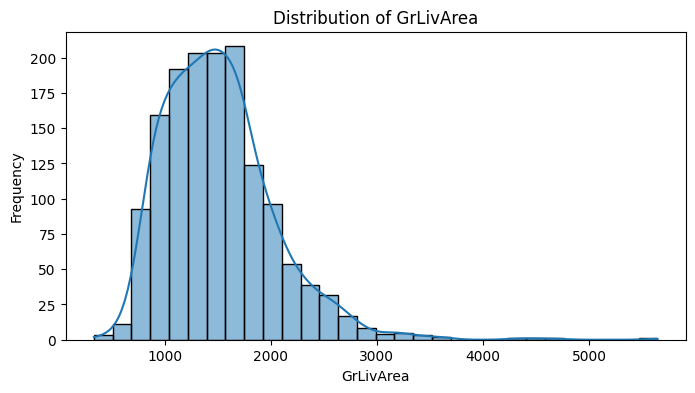

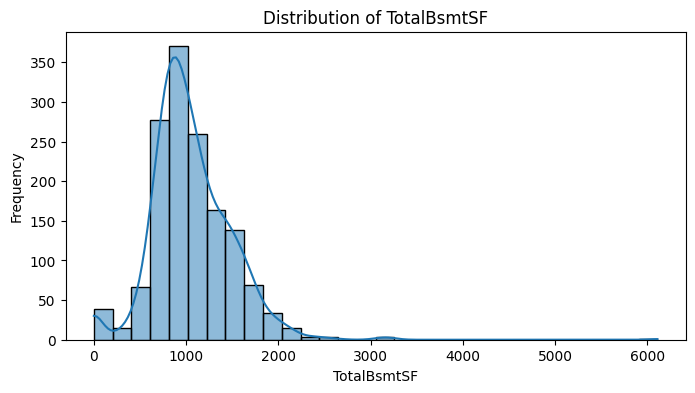

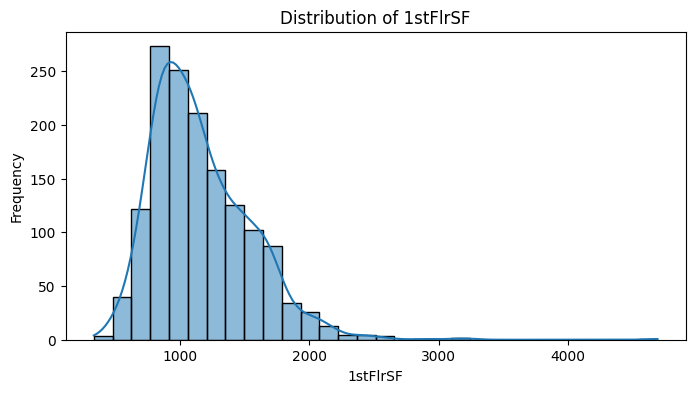

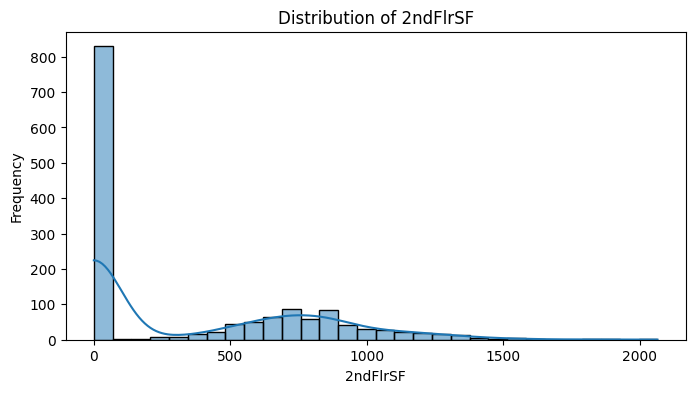

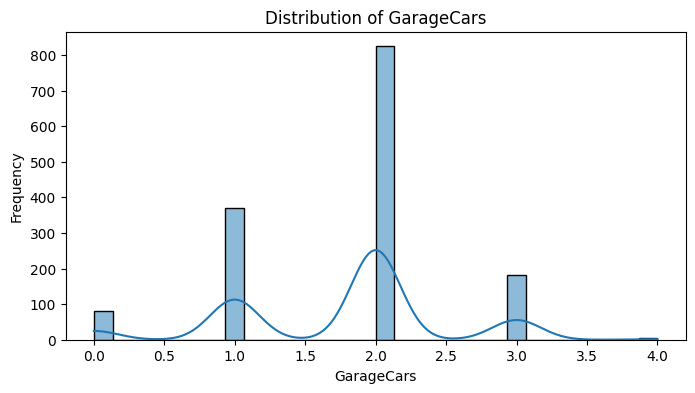

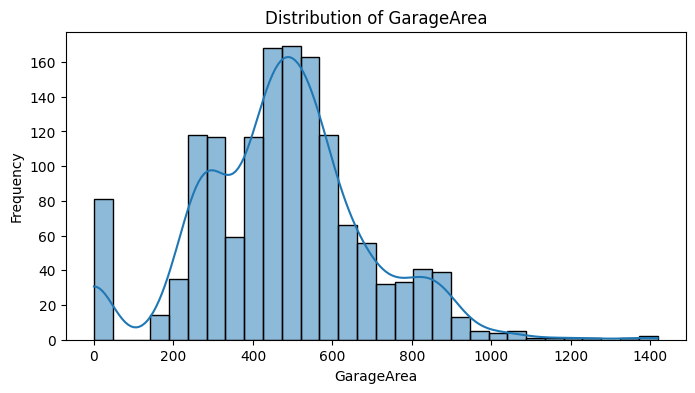

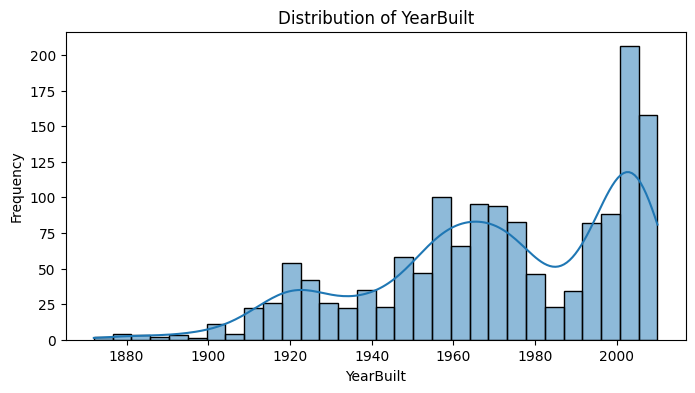

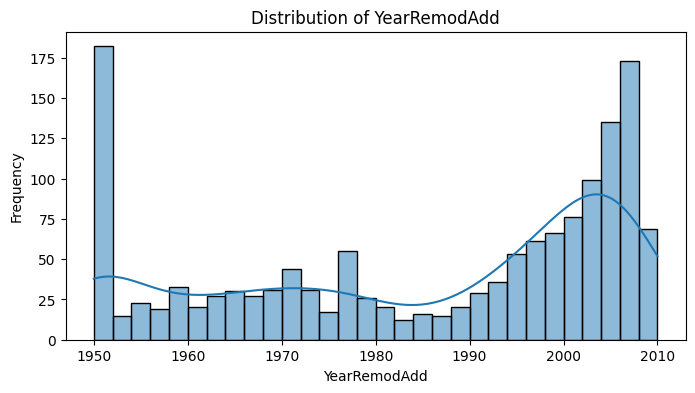

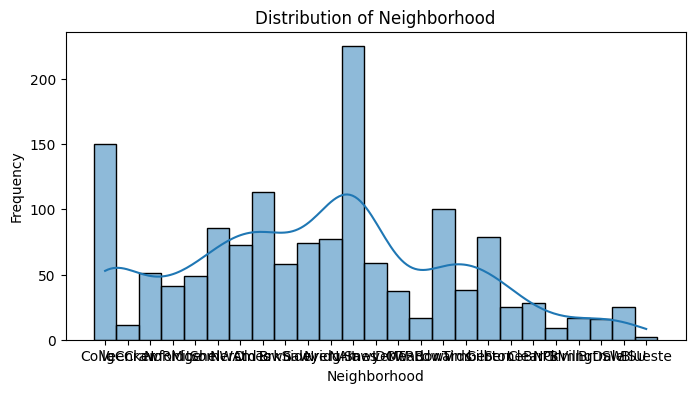

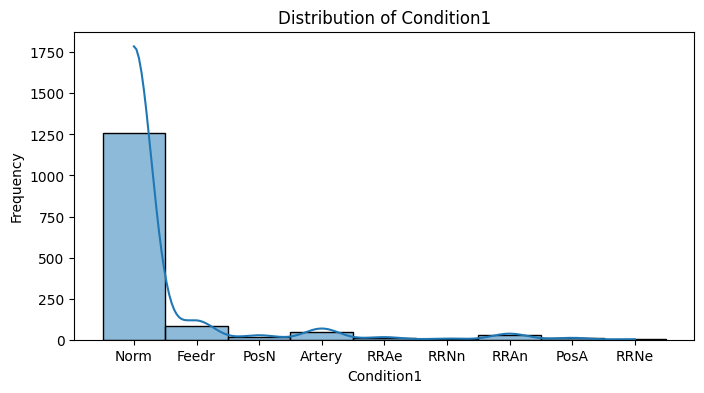

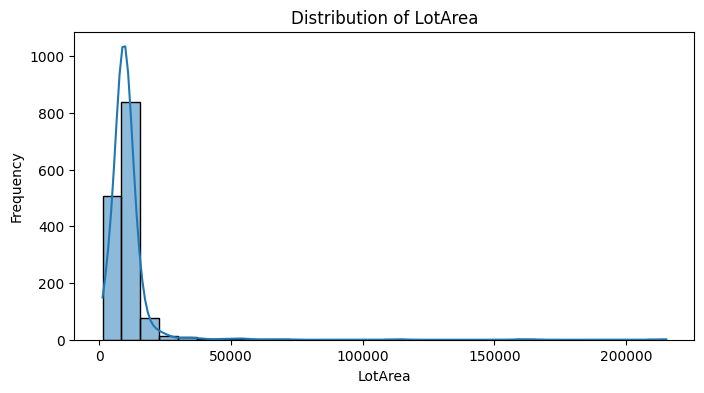

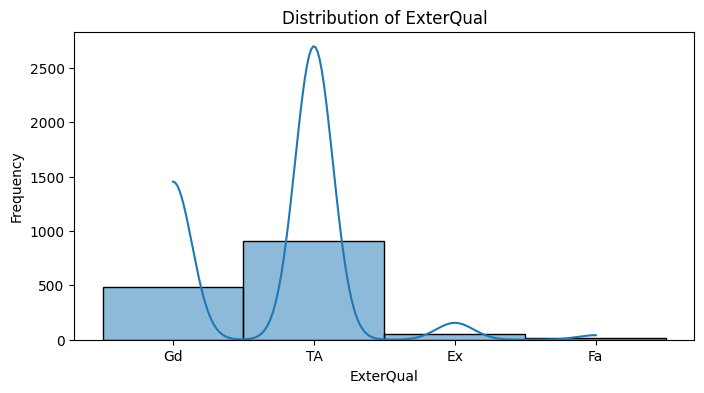

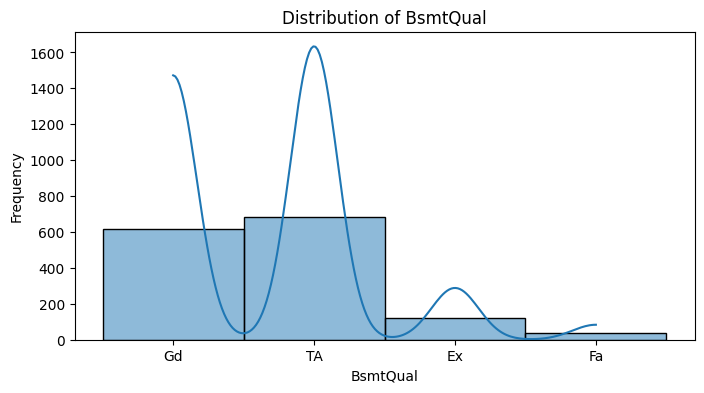

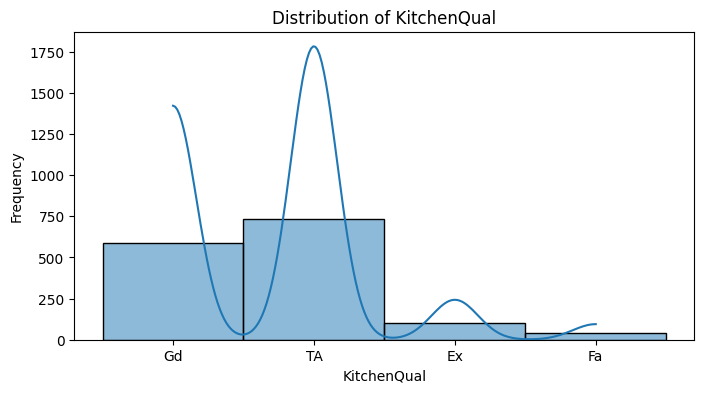

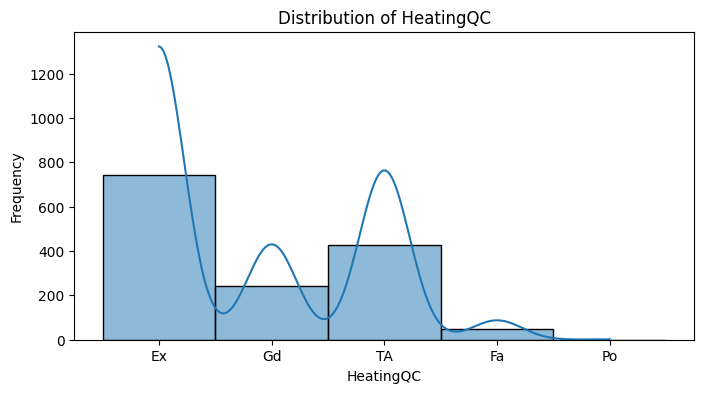

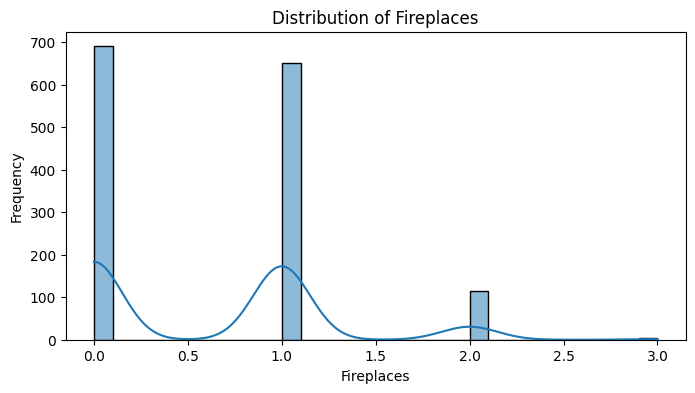

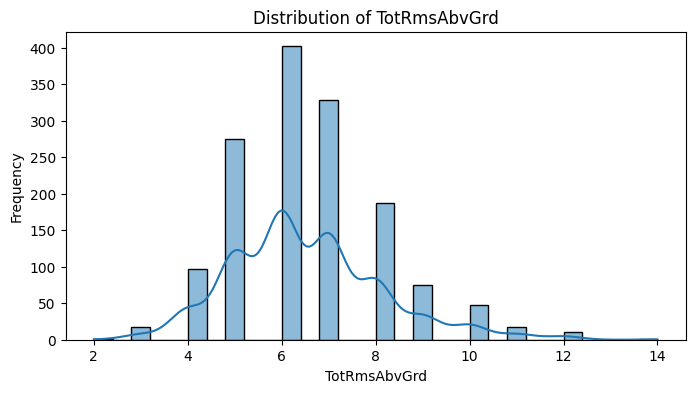

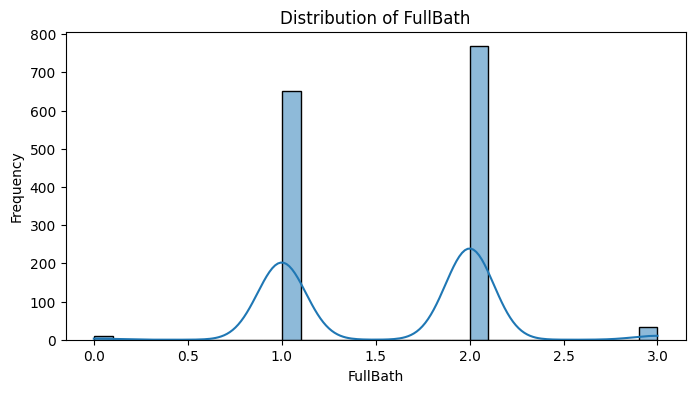

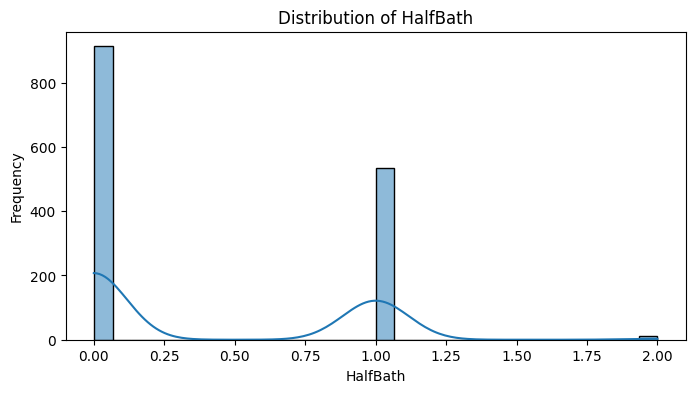

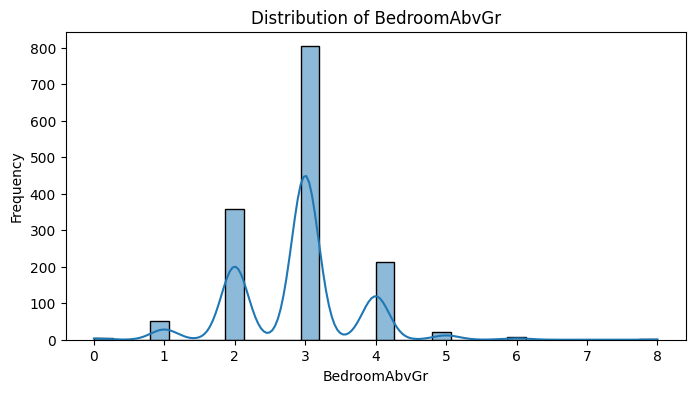

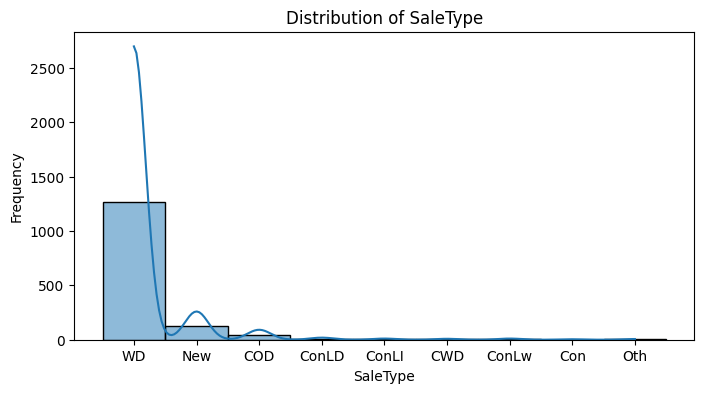

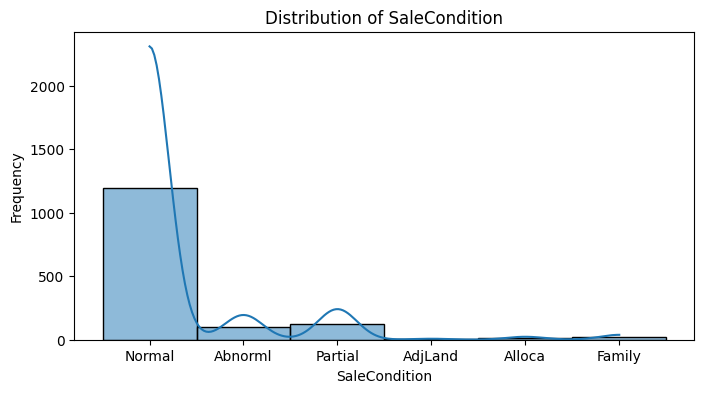

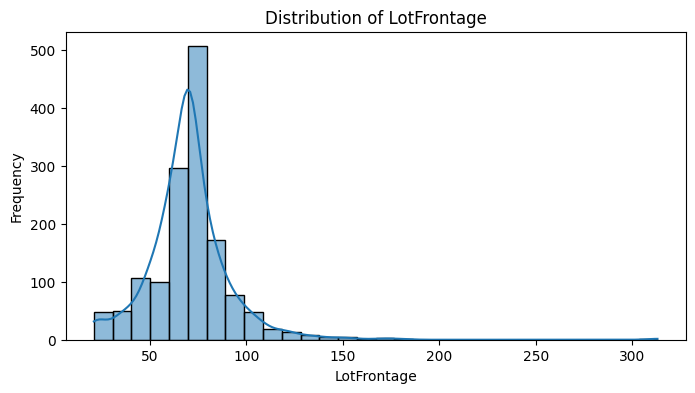

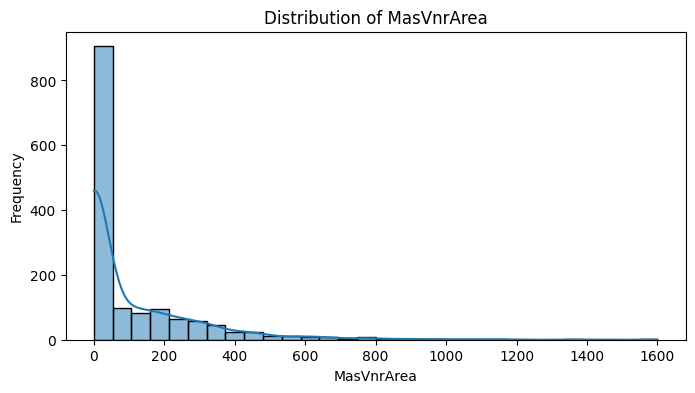

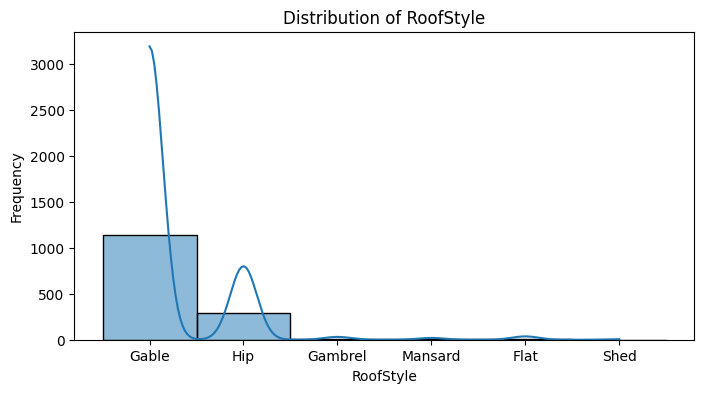

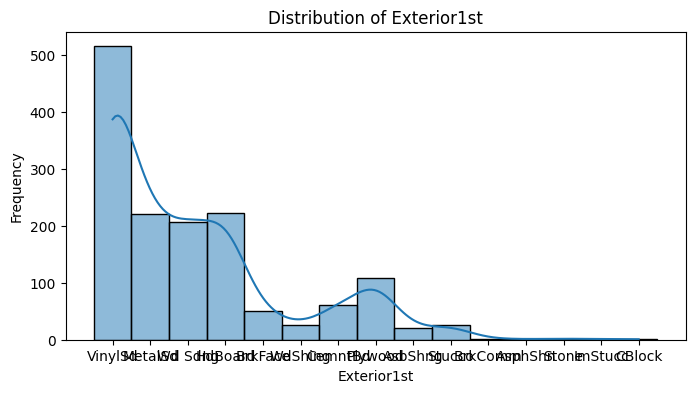

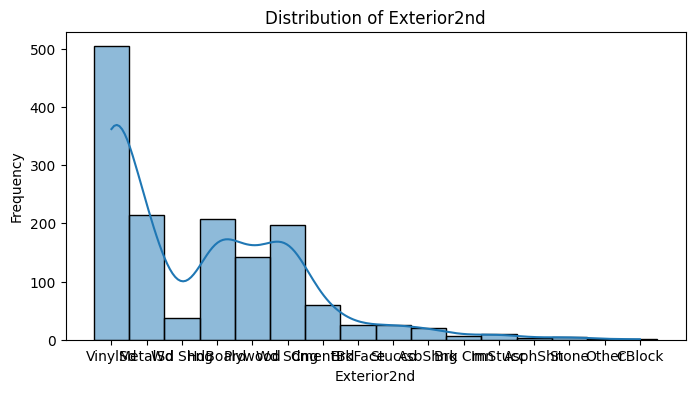

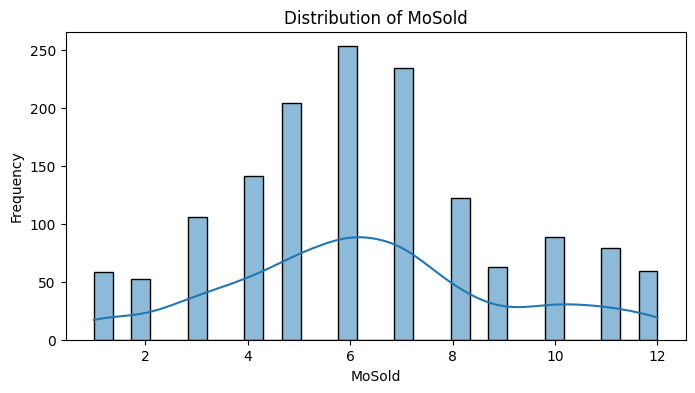

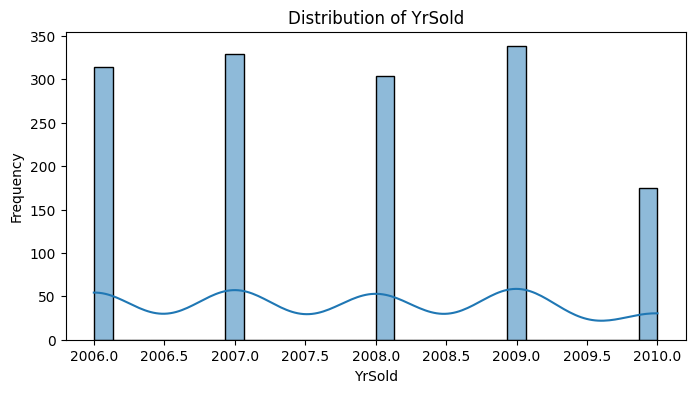

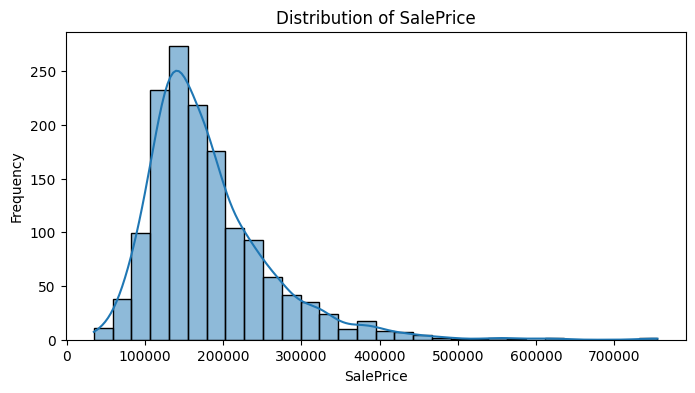

In [ ]:
#The purpose of this block is to visualize the distribution (how values are spread)
#for each feature in the train dataset.

# 1. Distribution Plot (Histogram) for each selected feature
for feature in train:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   float64
 1   GrLivArea      1460 non-null   float64
 2   TotalBsmtSF    1460 non-null   float64
 3   1stFlrSF       1460 non-null   float64
 4   2ndFlrSF       1460 non-null   float64
 5   GarageCars     1460 non-null   float64
 6   GarageArea     1460 non-null   float64
 7   YearBuilt      1460 non-null   float64
 8   YearRemodAdd   1460 non-null   float64
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  LotArea        1460 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  BsmtQual       1460 non-null   object 
 14  KitchenQual    1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  Fireplaces     1460 non-null   float64
 17  TotRmsAbvGrd   1460 non-null   float64
 18  FullBath

In [ ]:
# List of relevant numerical columns where outliers might need to be checked
numerical_columns = [
    'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageCars', 'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea'
]

# Function to detect and handle outliers using the IQR method
def handle_outliers(train, column, method='remove'):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'remove':
        # Remove outliers
        train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    elif method == 'cap':
        # Cap outliers
        train[column] = train[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return train

# Apply the outlier handling function to all relevant numerical columns
for column in numerical_columns:
    train = handle_outliers(train, column, method='remove')  # Change to 'cap' if you prefer to cap outliers instead of removing them

# Verify the changes
print("Data after handling outliers:")
train.describe()

Data after handling outliers:


,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageCars,GarageArea,YearBuilt,YearRemodAdd,LotArea,Fireplaces,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,LotFrontage,MasVnrArea,MoSold,YrSold,SalePrice
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,5.972542,1428.909655,1026.703277,1106.587245,317.109832,1.679362,447.113375,1969.508415,1984.424269,9167.676705,0.544730,6.341895,1.502214,0.350753,2.844110,67.697202,62.801693,6.375554,2007.814880,168696.016829
std,1.247035,421.055484,318.468982,302.368619,406.863664,0.709566,194.006492,30.892202,20.896439,2757.089593,0.615975,1.448290,0.529489,0.495639,0.773316,13.574380,99.640201,2.726083,1.320296,58852.680617
min,1.000000,438.000000,105.000000,438.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,1974.000000,0.000000,3.000000,0.000000,0.000000,0.000000,33.000000,0.000000,1.000000,2006.000000,34900.000000
25%,5.000000,1100.000000,804.000000,869.000000,0.000000,1.000000,308.000000,1950.000000,1965.000000,7500.000000,0.000000,5.000000,1.000000,0.000000,2.000000,60.000000,0.000000,5.000000,2007.000000,129000.000000
50%,6.000000,1396.000000,969.000000,1052.000000,0.000000,2.000000,462.000000,1971.000000,1993.000000,9100.000000,0.000000,6.000000,1.000000,0.000000,3.000000,70.049958,0.000000,6.000000,2008.000000,157000.000000
75%,7.000000,1694.000000,1216.000000,1301.000000,704.000000,2.000000,565.000000,2000.000000,2003.000000,10800.000000,1.000000,7.000000,2.000000,1.000000,3.000000,75.000000,108.000000,8.000000,2009.000000,197000.000000
max,10.000000,2730.000000,1952.000000,2028.000000,1611.000000,3.000000,954.000000,2010.000000,2010.000000,17104.000000,3.000000,12.000000,3.000000,2.000000,6.000000,105.000000,366.000000,12.000000,2010.000000,446261.000000


In [ ]:
train.shape

(1129, 31)

In [ ]:
# The output shows that your data now has 1129 rows,
# which means some rows were removed during the outlier handling process.

# Correlation Analysis


Analyze the correlation between numerical features and the target variable (SalePrice). This can help identify which features are most strongly related to house prices.

In [ ]:
#The output you've generated provides valuable insights into how each numerical
#feature in your dataset correlates with the target variable, SalePrice.

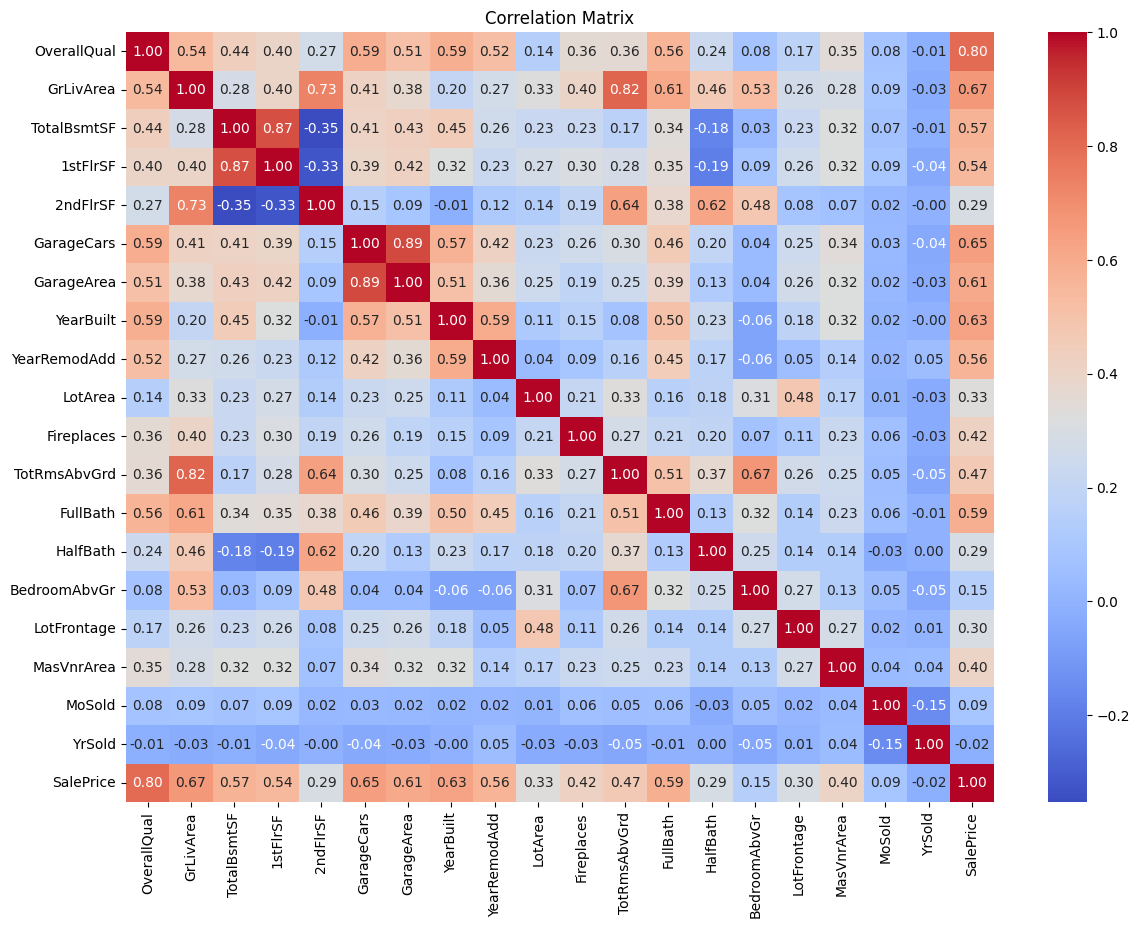

Correlation with SalePrice:
 SalePrice       1.000000
OverallQual     0.800169
GrLivArea       0.665277
GarageCars      0.645805
YearBuilt       0.628956
GarageArea      0.608952
FullBath        0.585081
TotalBsmtSF     0.567582
YearRemodAdd    0.561826
1stFlrSF        0.543463
TotRmsAbvGrd    0.469228
Fireplaces      0.419427
MasVnrArea      0.404115
LotArea         0.329532
LotFrontage     0.295007
2ndFlrSF        0.294916
HalfBath        0.289503
BedroomAbvGr    0.145121
MoSold          0.089305
YrSold         -0.016408
Name: SalePrice, dtype: float64


In [ ]:
# Select only numerical columns
numerical_df = train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns only
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlations with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Correlation with SalePrice:\n", corr_with_saleprice)

In [ ]:
#Weaker Correlations:

##BedroomAbvGr (0.145): The number of bedrooms above ground has a weaker positive
# correlation, meaning it doesn't strongly influence SalePrice.

##MoSold (0.089) and YrSold (-0.016): The month and year the house was sold have
#very weak correlations with SalePrice, suggesting that the timing of the sale has little to no effect on
#the price.

In [ ]:
#dropping weak features
weak_features = ['BedroomAbvGr', 'MoSold', 'YrSold']
train = train.drop(columns=weak_features)

# Feature Transformation
Some features might benefit from transformation to reduce skewness, especially those with a high correlation with SalePrice.

In [ ]:
from scipy.stats import skew
from numpy import log1p

# Identify skewed features and transform them
skewed_features = train[numerical_columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
print(skewness)

# Apply log1p (log(1 + x)) transformation to skewed features
skewed_features = skewness[skewness['Skew'] > 0.75].index
train[skewed_features] = train[skewed_features].apply(lambda x: log1p(x))


                 Skew
MasVnrArea   1.418843
2ndFlrSF     0.754475
1stFlrSF     0.597880
GrLivArea    0.527244
TotalBsmtSF  0.500053
LotArea      0.068095
LotFrontage -0.077224
GarageArea  -0.149357
GarageCars  -0.403384


In [ ]:
# Skewness is a measure of asymmetry in the distribution of data,
# and highly skewed data can affect the performance of machine learning models.

# One-Hot Encoding for Categorical Features
Encode categorical variables using one-hot encoding to prepare them for model building.



In [ ]:
# One-hot encode categorical variables
train = pd.get_dummies(train, columns=[
    'Neighborhood', 'Condition1', 'ExterQual', 'BsmtQual',
    'KitchenQual', 'HeatingQC', 'SaleType', 'SaleCondition',
    'RoofStyle', 'Exterior1st', 'Exterior2nd'
], drop_first=True)


In [ ]:
train.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'LotArea',
       ...
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng'],
      dtype='object', length=105)

In [ ]:
#after one-hot encoding, this dateset remains with 105 columns
train.shape[1]

105

# Feature Scaling
Standardize numerical features to ensure they are on a similar scale.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                      'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd',
                      'LotArea', 'LotFrontage', 'MasVnrArea', 'Fireplaces',
                      'TotRmsAbvGrd', 'FullBath', 'HalfBath']

train[numerical_features] = scaler.fit_transform(train[numerical_features])

In [ ]:
#the StandardScaler from the sklearn.preprocessing module.
#Standardization is a common preprocessing step in machine learning,
#particularly when using algorithms that are sensitive to the scale of the input features,
#such as linear models, SVMs, or neural networks.

# Model Building

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Define features and target variable
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [ ]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]

(790, 339, 790, 339)

In [ ]:
# Build a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
y_pred

array([ 2.21373950e+05,  1.53144593e+05,  1.23932392e+05,  1.14258132e+05,
        1.57288042e+05,  1.41659202e+05,  1.92069780e+05,  1.42385541e+05,
        1.36112067e+05,  2.66927936e+05,  1.27875693e+05,  1.78209785e+05,
        1.43153095e+05,  1.77791753e+05,  1.83138908e+05,  1.95374572e+05,
        1.51364422e+05,  1.36116294e+05,  2.01098526e+05,  2.09364953e+05,
        2.15031100e+05,  7.46139622e+04,  2.23999826e+05,  1.59801152e+05,
        2.13362562e+05,  1.81106292e+05,  1.16555227e+05,  1.75072016e+05,
        8.06946251e+04,  1.78205224e+05,  1.35074092e+05,  1.41227855e+05,
        1.11784460e+05,  1.20653516e+05,  1.88944071e+05,  1.84207475e+05,
        1.56566356e+05,  1.10288788e+05,  1.89018082e+05,  2.08591286e+05,
        1.78587225e+05,  1.35217485e+05,  1.28912420e+05,  1.15038730e+05,
        1.29408625e+05,  2.01252386e+05,  1.05113624e+05,  1.79121621e+05,
        1.96229732e+05,  1.40526956e+05,  1.79669645e+05,  2.59873124e+05,
        1.96656286e+05,  

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 6.159392048832953e+27
Root Mean Squared Error: 78481794378269.36


In [ ]:
# The MSE and RMSE is very large, indicating that the average squared difference between
# the predicted and actual values is extremely high.

# Ridge Regression

**Ridge Regression: A regularized version of linear regression that penalizes large coefficients to avoid overfitting, useful when the model has many predictors.
python**

In [ ]:
from sklearn.linear_model import Ridge

# Initialize and fit the Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')
# Calculate RMSE
rmse_ridge = np.sqrt(np.mean((y_test - y_pred_ridge) ** 2))
print(f'square Root Mean Squared Error: {rmse_ridge}')

Mean Squared Error (Ridge): 503214980.95305854
square Root Mean Squared Error: 22432.45374347306


In [ ]:
y_pred_ridge

array([222281.77382923, 152845.86388721, 122381.92974373, 128978.19795382,
       165531.41435587, 141639.11177726, 191969.25671485, 140025.61079485,
       134710.21150999, 266344.52313567, 127271.43516817, 180943.16087646,
       143129.7391336 , 178039.4220556 , 184840.81867178, 196487.26098272,
       154666.52946165, 136100.3353531 , 200847.667323  , 199882.10458323,
       215536.02809231,  77275.23935816, 224933.16081737, 161145.08976371,
       205427.7123886 , 180269.00451945, 115801.90269711, 177214.70056842,
        85638.98418002, 177472.80361866, 135213.07379857, 139337.97060311,
       111028.50444907, 120394.38068507, 186793.08564829, 189487.11017655,
       160195.77087442, 123096.40426765, 189063.94785042, 207114.95426086,
       179051.71178345, 132679.17348901, 125949.2571913 , 116609.70153634,
       128430.95488784, 201887.06725553,  98739.59314022, 178720.62705072,
       197344.79559555, 140363.43258803, 180883.92833532, 258592.04309083,
       202768.82317503,  

**Lasso Regression**

**Lasso Regression: Another form of regularized linear regression that can shrink coefficients to zero, effectively performing feature selection.
**

In [ ]:
from sklearn.linear_model import Lasso

# Initiate and fit the Lasso model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean squared error (lasso): {mse_lasso}')
# Calculate RMSE
rmse_lasso = np.sqrt(np.mean((y_test - y_pred_lasso) ** 2))
print(f'square Root Mean Squared Error: {rmse_lasso}')

Mean squared error (lasso): 515941245.9544973
square Root Mean Squared Error: 22714.340095069838


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.106e+10, tolerance: 2.692e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
y_pred_lasso

array([221393.40643894, 153095.00169145, 123932.65499839, 114775.89089696,
       157372.35110105, 141696.61851153, 192136.74847677, 142369.5181135 ,
       136138.25733478, 266885.73483821, 127889.70348617, 178120.96895572,
       143082.89164547, 177714.64750624, 183127.77250605, 195385.91197194,
       151404.83752039, 136153.17356802, 201107.02593652, 209298.8206828 ,
       215082.02228644,  74636.45322458, 224011.94306022, 159718.08258903,
       213357.56905395, 181111.13231569, 116575.7667678 , 175045.09617486,
        80675.20983717, 178253.8353562 , 135114.68012704, 141057.2182189 ,
       111752.18751956, 120652.71975637, 188849.23778286, 184209.42284322,
       156665.13790359, 110403.76477308, 188939.00843652, 208525.31544723,
       178546.70589532, 135255.81383319, 128814.94738259, 115066.68370324,
       129400.6635211 , 201321.35257619, 105199.59570676, 179143.69721565,
       196174.39200391, 140517.13551432, 179606.71824847, 259820.07955157,
       196643.11833327,  

# Decision Tree Regression

**Decision Tree Regression: A non-linear model that splits the data into branches to predict the target variable. It can capture complex relationships but is prone to overfitting.
**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Mean Squared Error (Decision Tree): {mse_tree}')
# Calculate RMSE
rmse_tree = np.sqrt(np.mean((y_test - y_pred_tree) ** 2))
print(f'square Root Mean Squared Error: {rmse_tree}')

Mean Squared Error (Decision Tree): 1104037131.5351512
square Root Mean Squared Error: 33227.05421091601


In [ ]:
y_pred_tree

array([223628.70454545, 155033.6875    , 135717.09302326, 135717.09302326,
       193350.43137255, 137084.88235294, 193350.43137255, 155033.6875    ,
       111720.83076923, 258079.06666667, 135717.09302326, 186457.70526316,
       118765.12727273, 193350.43137255, 172391.66666667, 223628.70454545,
       137084.88235294, 137084.88235294, 223628.70454545, 186457.70526316,
       223628.70454545, 135625.92592593, 223628.70454545, 118765.12727273,
       172391.66666667, 144539.39393939, 118765.12727273, 172391.66666667,
        98890.875     , 193350.43137255, 144539.39393939, 144539.39393939,
       118765.12727273, 137084.88235294, 118765.12727273, 186457.70526316,
       172391.66666667, 118765.12727273, 172391.66666667, 118700.        ,
       186457.70526316, 111720.83076923, 135717.09302326, 118700.        ,
       135717.09302326, 186457.70526316, 111720.83076923, 172391.66666667,
       186457.70526316, 118765.12727273, 135717.09302326, 227509.72      ,
       186457.70526316, 1

# Random Forest Regression

**Random Forest Regression: An ensemble method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.
**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')
# Calculate RMSE
rmse_rf = np.sqrt(np.mean((y_test - y_pred_rf) ** 2))
print(f'square Root Mean Squared Error: {rmse_rf}')

Mean Squared Error (Random Forest): 649141710.7567949
square Root Mean Squared Error: 25478.259570794762


In [ ]:
y_pred_rf

array([214078.34024095, 146032.8703016 , 137866.14193443, 126546.41140847,
       176613.73765343, 148288.93365238, 181413.07190398, 143317.54128402,
       145293.48550727, 237398.57035215, 137225.81853004, 168972.28631215,
       133656.92733451, 176318.24618822, 175851.11528442, 204576.44082389,
       142412.892543  , 121111.9422816 , 196077.2870353 , 196655.79619953,
       220652.72866045, 110229.64474972, 224378.63650201, 134276.49035814,
       169324.55858174, 162080.65225717, 131803.74213196, 168120.41993466,
       107527.69909483, 179636.31745564, 145556.58594929, 143303.39491884,
       129085.20126249, 126239.75587953, 137437.08669032, 198620.70162489,
       167320.72359238, 142115.96789288, 180997.84698325, 162852.68061507,
       170909.32708138, 122653.73185483, 123245.46563533, 114108.89649542,
       149558.49292616, 201683.73151363, 108649.43914814, 187844.09094535,
       188770.64729516, 141061.87160114, 161082.26614829, 248185.67908492,
       202730.25828976, 1

# Calculate MAPE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE for Linear Regression
mape_lr = mean_absolute_percentage_error(y_test, y_pred) * 100

# Calculate MAPE for Ridge Regression
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100

# Calculate MAPE for Lasso Regression
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso) * 100

# Calculate MAPE for Decision Tree
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree) * 100

# Calculate MAPE for Random Forest
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100


# Compare METRICS values
metrics_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest'],
    'MAPE (%)': [mape_lr, mape_ridge, mape_lasso, mape_tree, mape_rf],
    'MSE' : [mse,mse_ridge,mse_lasso,mse_tree, mse_rf],
    'RMSE' : [rmse, rmse_ridge, rmse_lasso, rmse_tree, rmse_rf]
})

metrics_results.sort_values(by='MAPE (%)', ascending=True)

,Model,MAPE (%),MSE,RMSE
1,Ridge Regression,9.900708e+00,5.032150e+08,2.243245e+04
2,Lasso Regression,1.004933e+01,5.159412e+08,2.271434e+04
4,Random Forest,1.031246e+01,6.491417e+08,2.547826e+04
3,Decision Tree,1.427931e+01,1.104037e+09,3.322705e+04
0,Linear Regression,7.104243e+09,6.159392e+27,7.848179e+13


#Metrics Overview:
###MAPE (Mean Absolute Percentage Error): Measures the accuracy of the model in terms of percentage. Lower MAPE indicates better accuracy.
###MSE (Mean Squared Error): Measures the average of the squared differences between actual and predicted values. Lower MSE indicates fewer errors.
###RMSE (Root Mean Squared Error): The square root of MSE, giving an error metric in the same units as the target variable. Lower RMSE indicates fewer errors.
#Model Comparison:
##Random Forest:

###MAPE: 10.64% (lowest among all models)
###MSE: 800,763,245.88 (lowest among all models)
###RMSE: 28,297.76 (lowest among all models)
##Ridge Regression:

###MAPE: 12.22%
###MSE: 952,011,379.89
###RMSE: 30,854.68
#Lasso Regression:

###MAPE: 12.68%
###MSE: 1,014,544,492.68
###RMSE: 31,851.92
#Linear Regression:

###MAPE: 12.70%
###MSE: 1,017,364,328.63
###RMSE: 31,896.15
#Decision Tree:

###MAPE: 15.96% (highest among all models)
###MSE: 1,533,754,648.41 (highest among all models)
###RMSE: 39,163.18 (highest among all models)
#Conclusion:
##The Random Forest model is the best choice.

#Why?

##Lowest MAPE: Indicates the highest accuracy in terms of percentage.
##Lowest MSE and RMSE: Suggests the smallest errors in predictions.
##Consistency: Random Forest consistently outperforms other models across all metrics.
This model strikes the best balance between accuracy (low MAPE) and error (low MSE and RMSE), making it the most reliable choice for your task.